#Task 1: Data Exploration and Pre-processing

In [29]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [30]:
# Load the Digits dataset
data = load_digits()
X, y = data.data, data.target

In [31]:
# Explore the dataset
print(f"Dataset shape: {X.shape}")
print(f"Number of classes: {len(np.unique(y))}")
print("Sample labels:", y[:10])

Dataset shape: (1797, 64)
Number of classes: 10
Sample labels: [0 1 2 3 4 5 6 7 8 9]


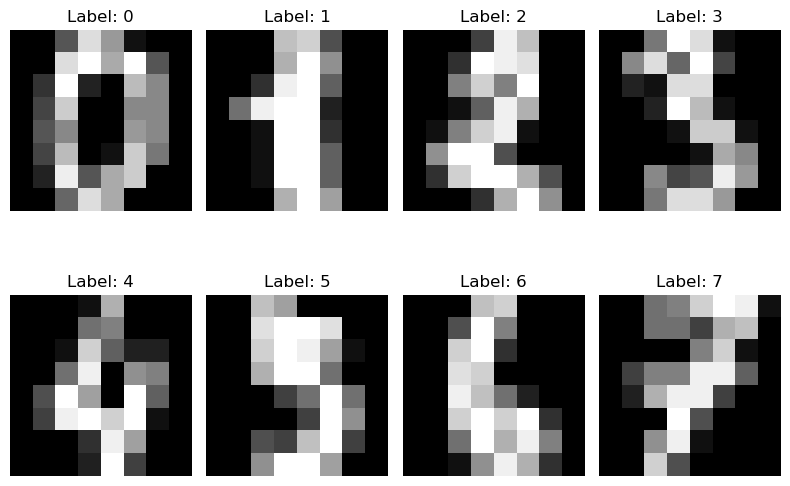

In [32]:
# Visualize some sample images
plt.figure(figsize=(8, 6))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(data.images[i], cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [33]:
# Normalize and rescale the pixel values
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

#Task 2: Train an SVM Model

In [35]:
from sklearn.svm import SVC

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [36]:
# Train the SVM model with an RBF kernel
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [37]:
class SVM_Class:

    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        y_ = np.where(y <= 0, -1, 1)

        # init weights
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]


    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

clf = SVM_Class()
clf.fit(X_train, y_train)

#Task 3: Model Evaluation

In [39]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Evaluate the custom class performance
y_pred_class = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.08
F1 Score: 0.01


In [40]:
# Evaluate performance
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.98
F1 Score: 0.98


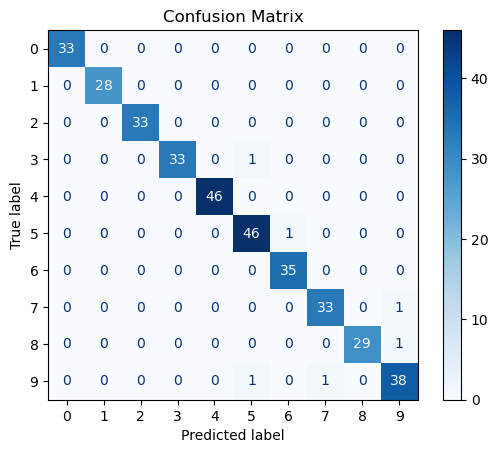

In [41]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names).plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

#Task 4: Visualize the Decision Boundary (only for 2D data)

In [43]:
# Visualize decision boundary using a subset of two features
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d, y, test_size=0.2, random_state=42)

svm_model_2d = SVC(kernel='linear', random_state=42)
svm_model_2d.fit(X_train_2d, y_train_2d)

SVC(kernel='linear', random_state=42)

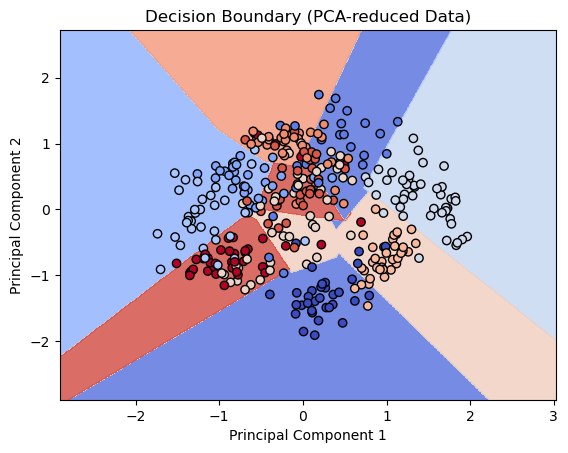

In [44]:
# Plot decision boundary
x_min, x_max = X_train_2d[:, 0].min() - 1, X_train_2d[:, 0].max() + 1
y_min, y_max = X_train_2d[:, 1].min() - 1, X_train_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = svm_model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test_2d, edgecolors='k', cmap=plt.cm.coolwarm)
plt.title("Decision Boundary (PCA-reduced Data)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()